<a href="https://colab.research.google.com/github/Kiro-tagama/IA-python/blob/main/ProjetoCancerDePele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Imagens

isic-archive - dataset

In [ ]:
import cv2
import glob
from google.colab.patches import cv2_imshow

import numpy as np
import PIL
from pathlib import Path

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# as importações feitas aqui n precisa ser refeita depois

In [ ]:
# Drive
from google.colab import drive
drive.mount('/content/drive/')

# Caminho para a pasta no Google Drive
folder_path = "/content/drive/MyDrive/Cancer_de_pele_IA/"
# ao executar espere alguns segundo até o carregamento ...

# Dataset da base de dados The International Skin Imaging Collaboration (ISIC),
# tendo dentro de cada pasta as fotos e um arquivo metadata que é csv

# melanoma  (117 imagens)
# maligno (7362 imagens)
# benigno (8k imagens)

melanoma = glob.glob(folder_path+'Melanoma-isic-data/*.JPG')
maligno = glob.glob(folder_path+'Maligno-isic-data/*.JPG')
benigno = glob.glob(folder_path+'Benigno-isic-data/*.JPG')

#print(str(melanoma[0]))
#PIL.Image.open(str(melanoma[0]))

# convertendo para string
str(melanoma)
str(maligno)
str(benigno)

Mounted at /content/drive/


"['/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012481.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012511.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012506.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012464.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012473.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012521.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012460.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012372.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012380.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012433.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012456.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-isic-data/ISIC_0012406.JPG', '/content/drive/MyDrive/Cancer_de_pele_IA/Benigno-

# Filtros

In [ ]:
def filtros(img, x):
  image = cv2.imread(img)
  imagem = cv2.resize(image, (400, 400))

  # binarização
  cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  _, bin = cv2.threshold(cinza, x,255, cv2.THRESH_BINARY)
  #Esse "_",é só uma variável para ignorar um dos parâmentros solicitados pelo método threshold
  # regular a margem de cor

  # contorno
  contours, _ = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  img_contours = cv2.drawContours(imagem.copy(), contours, -1, (0, 255, 0), 1)

  # negativo
  img_neg = cv2.bitwise_not(cinza)

  #saida
  cv2_imshow(bin)
  cv2_imshow(img_contours)
  cv2_imshow(img_neg)

#filtros('imagem.png')

# Preparando Imagens

In [ ]:
# Lista de caminhos para as imagens
image_paths = [melanoma[0],melanoma[1]]

# Cria uma matriz vazia para armazenar as imagens
image_matrix = np.empty((len(image_paths), 224, 224, 3), dtype=np.uint8)

# Loop para carregar as imagens e adicioná-las à matriz
for i, path in enumerate(image_paths):
  image = cv2.imread(path)
  image = cv2.resize(image, (224, 224)) # Redimensiona a imagem para 224x224 pixels
  image_matrix[i] = image

# Verifica as dimensões da matriz
print(image_matrix.shape) # Saída: (número de imagens, altura, largura, número de canais de cor)

(2, 224, 224, 3)


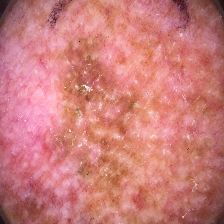

[[[22 19 37]
  [27 20 41]
  [31 25 44]
  ...
  [24 21 37]
  [21 18 34]
  [20 16 35]]

 [[24 20 39]
  [27 21 40]
  [28 24 43]
  ...
  [22 19 35]
  [22 18 37]
  [17 13 32]]

 [[25 21 40]
  [32 26 45]
  [27 23 42]
  ...
  [24 21 37]
  [25 21 40]
  [21 17 36]]

 ...

 [[19 16 32]
  [21 16 31]
  [21 17 29]
  ...
  [40 37 67]
  [38 38 62]
  [46 46 70]]

 [[19 16 32]
  [20 15 30]
  [21 17 29]
  ...
  [42 40 70]
  [41 41 65]
  [41 39 61]]

 [[16 13 29]
  [17 14 29]
  [22 18 30]
  ...
  [38 36 65]
  [48 45 70]
  [45 37 56]]]
(2, 224, 224, 3)


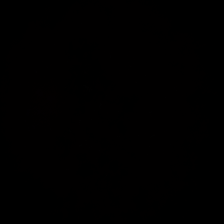

[[[-2.9119844 -2.976591  -2.58895  ]
  [-2.8043063 -2.9550555 -2.5028074]
  [-2.7181637 -2.8473775 -2.4382005]
  ...
  [-2.8689132 -2.93352   -2.58895  ]
  [-2.93352   -2.9981267 -2.6535568]
  [-2.9550555 -3.041198  -2.6320212]]

 [[-2.8689132 -2.9550555 -2.5458786]
  [-2.8043063 -2.93352   -2.524343 ]
  [-2.7827706 -2.8689132 -2.459736 ]
  ...
  [-2.9119844 -2.976591  -2.6320212]
  [-2.9119844 -2.9981267 -2.58895  ]
  [-3.0196624 -3.105805  -2.696628 ]]

 [[-2.8473775 -2.93352   -2.524343 ]
  [-2.696628  -2.825842  -2.4166648]
  [-2.8043063 -2.8904488 -2.4812717]
  ...
  [-2.8689132 -2.93352   -2.58895  ]
  [-2.8473775 -2.93352   -2.524343 ]
  [-2.93352   -3.0196624 -2.6104856]]

 ...

 [[-2.976591  -3.041198  -2.696628 ]
  [-2.93352   -3.041198  -2.7181637]
  [-2.93352   -3.0196624 -2.761235 ]
  ...
  [-2.524343  -2.58895   -1.9428809]
  [-2.5674143 -2.5674143 -2.050559 ]
  [-2.3951292 -2.3951292 -1.8782741]]

 [[-2.976591  -3.041198  -2.696628 ]
  [-2.9550555 -3.0627337 -2.7396994]


In [ ]:
# Teste de entrada
cv2_imshow(image_matrix[0])
print(image_matrix[0])

# Normaliza as intensidades de pixel
image_matrix = image_matrix.astype('float32')
mean = np.mean(image_matrix)
std = np.std(image_matrix)
image_matrix -= mean
image_matrix /= std

# Verifica as dimensões da matriz após o pré-processamento
print(image_matrix.shape) # Saída: (número de imagens, altura, largura, número de canais de cor)

# Teste de saida
cv2_imshow(image_matrix[0])
print(image_matrix[0])

# Conjuntos de teste

In [ ]:
from sklearn.model_selection import train_test_split

# Divide a matriz de imagens e os rótulos em conjunto de treinamento e teste
train_images, test_images, train_labels, test_labels = train_test_split(
    image_matrix, labels, test_size=0.2, random_state=42)

# Verifica o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", train_images.shape[0])
print("Tamanho do conjunto de teste:", test_images.shape[0])


NameError: ignored

# Modelo de aprendizagem de máquina

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Cria o modelo da rede neural convolucional
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compila o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treina o modelo
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


# Teste

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Acurácia do conjunto de teste:', test_acc)


# Treinamento do Modelo

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Carregando os dados
X = np.load("imagens.npy") # array com as imagens redimensionadas
y = np.load("rotulos.npy") # array com os rótulos correspondentes

# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Treinando o modelo
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Avaliando o modelo
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))


# Classificação / Ajuste

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# Carregar o modelo treinado
model = load_model('modelo.h5')

# Carregar uma nova imagem para classificar
imagem = cv2.imread('imagem.jpg')
imagem = cv2.resize(imagem, (largura, altura)) # redimensionar para o tamanho das imagens de treinamento
imagem = np.expand_dims(imagem, axis=0) # adicionar uma dimensão para corresponder ao formato esperado pelo modelo

# Classificar a imagem
resultado = model.predict(imagem)
if resultado > 0.5:
    print("A imagem contém câncer de pele.")
else:
    print("A imagem não contém câncer de pele.")


# Avaliação do Modelo

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np

# Carregar o modelo treinado
model = load_model('modelo.h5')

# Carregar os dados de teste
X_teste = np.load('X_teste.npy')
y_teste = np.load('y_teste.npy')

# Classificar as imagens de teste
y_pred = model.predict_classes(X_teste)

# Calcular a acurácia
acuracia = accuracy_score(y_teste, y_pred)

print("A acurácia do modelo é:", acuracia)


# Previsões / "em fase de testes"

In [ ]:
from keras.models import load_model
import numpy as np
import cv2

# Carregar o modelo treinado
model = load_model('modelo.h5')

# Carregar a imagem de teste
imagem = cv2.imread('exemplo_imagem.jpg')

# Redimensionar a imagem para o tamanho esperado pelo modelo
imagem_redimensionada = cv2.resize(imagem, (224, 224))

# Normalizar os valores dos pixels para o intervalo [0, 1]
imagem_normalizada = imagem_redimensionada.astype('float32') / 255.0

# Adicionar uma dimensão extra para representar o batch de imagens
imagem_normalizada = np.expand_dims(imagem_normalizada, axis=0)

# Fazer a previsão usando o modelo
previsao = model.predict(imagem_normalizada)

# Imprimir a previsão
if previsao[0] > 0.5:
    print("A imagem contém câncer de pele.")
else:
    print("A imagem não contém câncer de pele.")


# IA secundaria (teste 2)

pode demorar cerca de 1h pra carregar tudo

In [ ]:
# Define o tamanho das imagens de entrada
input_shape = (128, 128, 3)  # Altere de acordo com o tamanho das suas imagens

In [ ]:
# Carrega as imagens de melanoma
melanoma_images = []
for filename in melanoma:
    img = load_img(filename, target_size=input_shape[:2])
    img = img_to_array(img)
    melanoma_images.append(img)
melanoma_images = np.array(melanoma_images)

In [ ]:
# Carrega as imagens malignas
maligno_images = []
for filename in maligno:
    img = load_img(filename, target_size=input_shape[:2])
    img = img_to_array(img)
    maligno_images.append(img)
maligno_images = np.array(maligno_images)

# em torno de 10 min para processar

In [ ]:
# Carrega as imagens benignas
benigno_images = []
for filename in benigno:
    img = load_img(filename, target_size=input_shape[:2])
    img = img_to_array(img)
    benigno_images.append(img)
benigno_images = np.array(benigno_images)

# em torno de 15 min para processar

In [ ]:
# Cria os rótulos para as imagens (0 para benigno, 1 para maligno, 2 para melanoma)
labels = np.concatenate((np.zeros(len(benigno_images)), np.ones(len(maligno_images)), 2*np.ones(len(melanoma_images))))

# Normaliza as imagens
melanoma_images = melanoma_images / 255.0
maligno_images = maligno_images / 255.0
benigno_images = benigno_images / 255.0

# Divide as imagens em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    np.concatenate((benigno_images, maligno_images, melanoma_images)), labels, test_size=0.2, random_state=42)

# Constrói o modelo CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compila o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treina o modelo
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))
# 40 size e 8 epocas (padrão ok)

# Avalia o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

model.save('modelo_treinado.h5')

# com 6 epocas aproximandamente 30min

#Função TesteIA


In [ ]:
# Função para testar com uma única imagem
from keras.models import load_model
# Define o tamanho das imagens de entrada
input_shape = (128, 128, 3)  # Altere de acordo com o tamanho das suas imagens
def testIA(image_path):
    model = load_model(folder_path +'treinoV5.h5') # se baixar do drive coloque (folder_path + 'treinoV1.h5')
    # Carrega a imagem de teste
    img = load_img(image_path, target_size=input_shape[:2])
    img = img_to_array(img)
    img = img / 255.0  # Normaliza a imagem

    # Redimensiona a imagem para o formato esperado pelo modelo
    img = np.expand_dims(img, axis=0)

    # Realiza a predição da classe
    predictions = model.predict(img)
    class_index = np.argmax(predictions)

    # Obtém as probabilidades de todas as classes
    probabilities = predictions[0]
    probabilities = [round(p * 100, 2) for p in probabilities]

    # Retorna o rótulo correspondente à classe predita
    if class_index == 0:
        predicted_class = 'Benigno'
    elif class_index == 1:
        predicted_class = 'Maligno'
    elif class_index == 2:
        predicted_class = 'Melanoma'

    # Imprime a classe prevista e as probabilidades de todas as classes
    print("Classe prevista:", predicted_class)
    print("Probabilidades:")
    print("Benigno:", probabilities[0], "%")
    print("Maligno:", probabilities[1], "%")
    print("Melanoma:", probabilities[2], "%")

# Final

---
#### IA
Versão 5 - com acuracia de ~85%
melanoma é dificil de avaliar pois a quantidade de imagens é menos de 5%
#### Filtros
 - Binarização
 - Contorno
 - Contraste negativo

1/1 [==============================] - 0s 135ms/step
Classe prevista: Maligno
Probabilidades:
Benigno: 33.16 %
Maligno: 66.71 %
Melanoma: 0.13 %





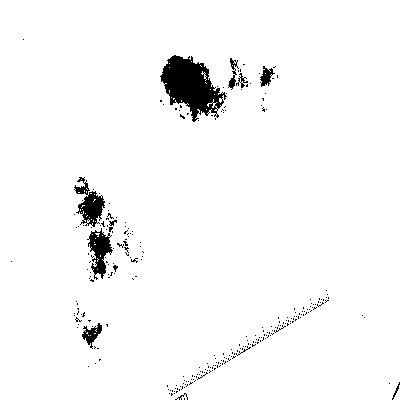

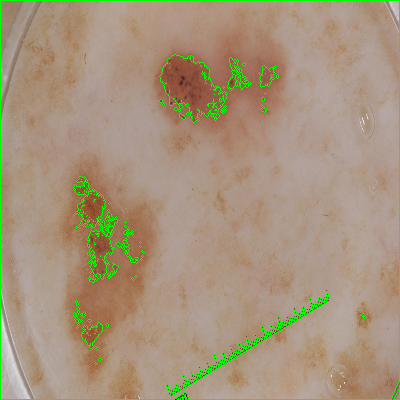

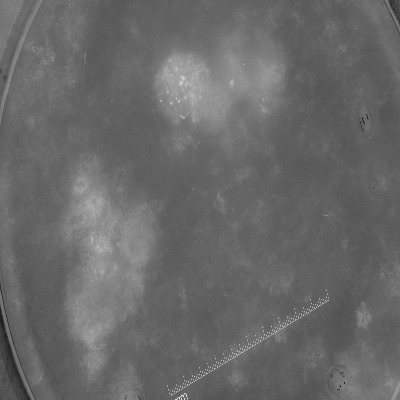

In [ ]:
# Imagem a ser usada

img = maligno[200]
#img = 'imagem.jpg'

# ia
testIA(img)

print('\n\n')
# filtros

# esse valor de regulagem para qual ficar melhor
# (recomendado um valor de  110 a 170)
filtros(img, 110)